<a href="https://colab.research.google.com/github/YLiu95/stat/blob/main/Coursework_4_storks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ECS7024P - STATISTICS FOR ARTIFICIAL INTELLIGENCE AND DATA SCIENCE

#Coursework 4 Storks Part 2: Additional Analysis of the Storks Data

##Section 1 Introduction

- In this notebook, we will compare two pairs of models.
    - In the first pair, we compare the models' ability to explain the variability of the number of births (`BirthRate`).
    - In the second pair, we compare the models' ability to predict the number of storks (`Storks`).
- We will compare the models' fit by looking at their scatter plots and metrics.
- We will use the bootstrap method to find out if we can be confident about the models' differences in their ability to explain variability or to predict.
- Section 2 compares the first pair of models.
- Section 3 compares the second pair of models.
- Section 4 concludes.

###1.1 Outline

- Section 1 Introduction
    - 1.1 Outline
    - 1.2 Import the data
- Section 2 Analysis 1
    - 2.1 Regression
    - 2.2 Bootstrap
- Section 3 Analysis 2
    - 3.1 Regression
    - 3.2 Bootstrap
- Section 4 Conclusion

###1.2 Import the data

- The unit for `Area` is square kilometres. 
- The unit for `Storks` is pairs.
- The unit for `Humans` is million.
- The unit for `BirthRate` is thousand babies per year.
- The unit for `SuitableAreaPercent` is percentage.

In [ ]:
import pandas as pd
stork = pd.read_csv('https://raw.githubusercontent.com/YLiu95/stat/main/storks.csv')
stork.head()

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46


##Section 2 Analysis 1

### 2.1 Regression
Implement two regression models for the number of births.

####Model 1
Predictor: the number of storks (`Storks`)

- Convert `BirthRate` and `Storks` into a suitable format.
- Use `fit` to fit the linear regression.
- Calculate R2 and RMSE
    - R2 is the coefficient of determination
        - It measures the proportion of the variance of the dependent variable that is predictable from the independent variable.
    - RMSE is the root mean squared error.
        - It is the accuracy of predictor for the continuous variable.
    - Both R2 and RMSE measure the goodness of fit.
- Since R2 here is 0.385, 38.5% of the variance of `BirthRate` is predictable from `Storks`.

In [ ]:
import numpy as np
y = stork.BirthRate
X = np.column_stack(stork.Storks).T

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))


from sklearn.metrics import mean_squared_error
y_hat = reg.predict(X)
print('Root of the mean squared error (RMSE): %.2f'% mean_squared_error(y, y_hat, squared=False))

The R2 coefficient of determination is 0.385
Root of the mean squared error (RMSE): 312.03


- Plot a scatter of the actual values against the predicted values. 
- If the regression fitted better, the points would be nearer to the blue line.

Text(0, 0.5, 'Actual Value')

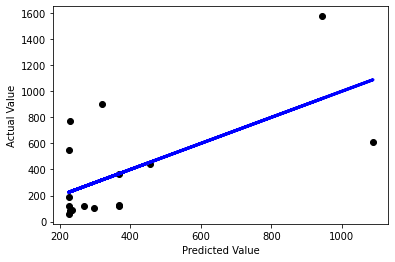

In [ ]:
import matplotlib.pyplot as plt
fig, a = plt.subplots(1,1)
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)
a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

####Model 2
Predictor: the population size (`Humans`)

- Convert `BirthRate` and `Humans` into a suitable format.
- Use `fit` to fit the linear regression.
- Calculate R2 and RMSE
- Since R2 here is 0.725, 72.5% of the variance of `BirthRate` is predictable from `Humans`.


- Compared to model 1, model 2's R2 is bigger and the RMSE is smaller.
- This means a larger proportion of the variance of `BirthRate` is predictable from `Humans` than `Storks`.
- The accuracy of predictor `Humans` is greater than that of predictor `Storks`.

In [ ]:
y = stork.BirthRate
X = np.column_stack(stork.Humans).T

reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))

y_hat = reg.predict(X)
print('Root of the mean squared error (RMSE): %.2f'
% mean_squared_error(y, y_hat, squared=False))

The R2 coefficient of determination is 0.725
Root of the mean squared error (RMSE): 208.78


- Plot a scatter of the actual values against the predicted values.


- Compared to model 1, the points here are closer to the blue line.
- Therefore, model 2 fitted better.

Text(0, 0.5, 'Actual Value')

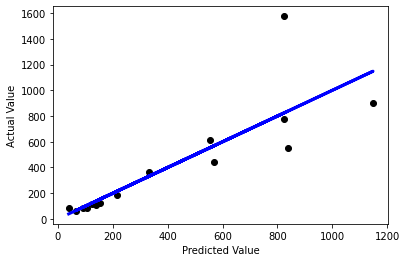

In [ ]:
fig, a = plt.subplots(1,1)
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)
a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### 2.2 Bootstrap
Use the bootstrap technique to estimate the distribution of the difference in the R2 parameter for the two models.

- Define a simple bootstrap function

In [ ]:
from sklearn.utils import resample
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data)) # default is to resample, same size
    return result

- Resample the data; fit both models; calculate the difference in the R2 parameter for the two models.
- Repeat these steps 500 times and plot a distribution of the differences.

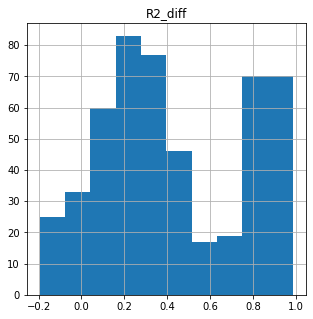

In [ ]:
def R2_diff(df):
    y = df.BirthRate
    X_Storks = np.column_stack(df.Storks).T
    X_Humans = np.column_stack(df.Humans).T
    reg_Storks = LinearRegression().fit(X_Storks, y)
    reg_Humans = LinearRegression().fit(X_Humans, y)
    return [reg_Humans.score(X_Humans, y) - reg_Storks.score(X_Storks, y)]

bstrap = bootstrapC(stork, ['R2_diff'], 500, R2_diff) 
_ = bstrap.hist(figsize=(5,5))

- Estimate appropriate confidence intervals for the difference in the R2 values.


- The 90% and 99% bootstrap confidence intervals include zero difference.
- Therefore, we cannot be confident that one of the models explains more of the variability in the number of births than the other model.
- This is because the R2 of the two models may be equal. 

In [ ]:
R2_diff = R2_diff(stork)[0]
print("The difference between the R2 (model 2 - model 1) is %3.2f with 80%% CI %3.2f to %3.2f" % 
      (R2_diff, bstrap.R2_diff.quantile(0.1), bstrap.R2_diff.quantile(0.9)))
print("The difference between the R2 (model 2 - model 1) is %3.2f with 90%% CI %3.2f to %3.2f" % 
      (R2_diff, bstrap.R2_diff.quantile(0.05), bstrap.R2_diff.quantile(0.95)))
print("The difference between the R2 (model 2 - model 1) is %3.2f with 99%% CI %3.2f to %3.2f" % 
      (R2_diff, bstrap.R2_diff.quantile(0.005), bstrap.R2_diff.quantile(0.995)))

The difference between the R2 (model 2 - model 1) is 0.34 with 80% CI 0.02 to 0.90
The difference between the R2 (model 2 - model 1) is 0.34 with 90% CI -0.08 to 0.94
The difference between the R2 (model 2 - model 1) is 0.34 with 99% CI -0.17 to 0.98


##Section 3 Analysis 2

###3.1 Regression
Implement two regression models for the number of storks.

####Model 1
Predictor: the land area (`Area`)

- Convert `Storks` and `Area` into a suitable format.
- Use `fit` to fit the linear regression.
- Calculate R2 and RMSE
- Since R2 here is 0.336, 33.6% of the variance of `Storks` is predictable from `Area`.

In [ ]:
y = stork.Storks
X = np.column_stack(stork.Area).T

reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))

y_hat = reg.predict(X)
print('Root of the mean squared error (RMSE): %.2f'% mean_squared_error(y, y_hat, squared=False))

The R2 coefficient of determination is 0.336
Root of the mean squared error (RMSE): 6984.77


- Plot a scatter of the actual values against the predicted values. 
- If the regression fitted better, the points would be nearer to the blue line.

Text(0, 0.5, 'Actual Value')

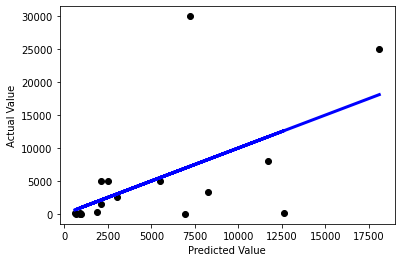

In [ ]:
fig, a = plt.subplots(1,1)
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)
a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

####Model 2
Predictor: the population density (`ρ_humans`) and the area of suitable land (`area_suit`)

- Create the two predictor variables.
    - The unit for `ρ_humans` is people per square kilometres.
    - The unit for `area_suit` is square kilometres.
- Convert `ρ_humans` and `area_suit` into a suitable format.
- Use `fit` to fit the linear regression.
- Calculate R2 and RMSE
- Since R2 here is 0.393, 39.3% of the variance of `Storks` is predictable from `ρ_humans` and `area_suit`.


- Compared to model 1, model 2's R2 is bigger and the RMSE is smaller.
- This means a larger proportion of the variance of `BirthRate` is predictable from `ρ_humans` and `area_suit` than `Area`.
- The accuracy of predictors `ρ_humans` and `area_suit` is greater than that of predictor `Area`.

In [ ]:
stork['ρ_humans'] = stork.Humans*1000000 / stork.Area
stork['area_suit'] = stork.SuitableAreaPercent*stork.Area

y = stork.Storks
X = np.column_stack((stork.ρ_humans,stork.area_suit))

reg = LinearRegression().fit(X, y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))

y_hat = reg.predict(X)
print('Root of the mean squared error (RMSE): %.2f'
% mean_squared_error(y, y_hat, squared=False))

The R2 coefficient of determination is 0.393
Root of the mean squared error (RMSE): 6677.03


- Plot a scatter of the actual values against the predicted values.


- Compared to model 1, the points here are closer to the blue line.
- Therefore, model 2 fitted better.

Text(0, 0.5, 'Actual Value')

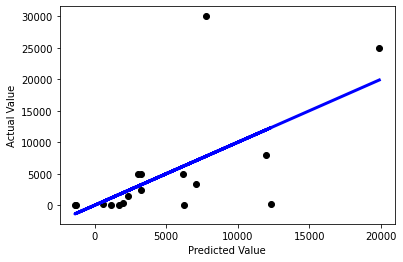

In [ ]:
fig, a = plt.subplots(1,1)
a.scatter(y_hat, y,  color='black')
a.plot(y_hat, y_hat, color='blue', linewidth=3)
a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### 3.2 Bootstrap
Use the bootstrap technique to estimate the difference in the root mean squared
error (RMSE) between the predicted and actual values for the two models.

- Resample the data; fit both models; calculate the difference in the RMSE parameter for the two models.
- Repeat these steps 500 times and plot a distribution of the differences.

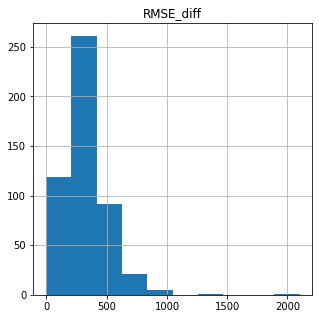

In [ ]:
def RMSE_diff(df):
    y = df.Storks
    X_Area = np.column_stack(df.Area).T
    X_ρ_suit = np.column_stack((df.ρ_humans,df.area_suit))
    reg_Area = LinearRegression().fit(X_Area, y)
    reg_ρ_suit = LinearRegression().fit(X_ρ_suit, y)
    y_hat_Area = reg_Area.predict(X_Area)
    y_hat_ρ_suit = reg_ρ_suit.predict(X_ρ_suit)
    return [mean_squared_error(y, y_hat_Area, squared=False) - mean_squared_error(y, y_hat_ρ_suit, squared=False)]

bstrap = bootstrapC(stork, ['RMSE_diff'], 500, RMSE_diff) 
_ = bstrap.hist(figsize=(5,5))

- Estimate appropriate confidence intervals for the difference in the RMSE values.


- None of the bootstrap confidence intervals include zero difference.
- Therefore, we can be confident that model 2 predicts the number of storks better than model 1.
- This is because the RMSE of model 2 may be smaller than that of model 1. 

In [ ]:
RMSE_diff = RMSE_diff(stork)[0]
print("The difference between the RMSE (model 1 - model 2) is %3.2f with 80%% CI %3.2f to %3.2f" % 
      (RMSE_diff, bstrap.RMSE_diff.quantile(0.1), bstrap.RMSE_diff.quantile(0.9)))
print("The difference between the RMSE (model 1 - model 2) is %3.2f with 90%% CI %3.2f to %3.2f" % 
      (RMSE_diff, bstrap.RMSE_diff.quantile(0.05), bstrap.RMSE_diff.quantile(0.95)))
print("The difference between the RMSE (model 1 - model 2) is %3.2f with 99%% CI %3.2f to %3.2f" % 
      (RMSE_diff, bstrap.RMSE_diff.quantile(0.005), bstrap.RMSE_diff.quantile(0.995)))

The difference between the RMSE (model 1 - model 2) is 307.74 with 80% CI 134.16 to 509.70
The difference between the RMSE (model 1 - model 2) is 307.74 with 90% CI 98.15 to 641.33
The difference between the RMSE (model 1 - model 2) is 307.74 with 99% CI 10.24 to 997.28


##Section 4 Conclusion

- We compared two pairs of models.
    - In the first pair, we compared the two models' ability to explain the variability of the number of births (`BirthRate`).
    - In the second pair, we compared the two models' ability to predict the number of storks (`Storks`).
- The second models in each pair have a better fit than the first models.
    - This can be seen by looking at the scatter plots and metrics in each pair of models.
- In the first bootstrap analysis, we cannot be confident that model 2 explains more of the variability in the number of births (`BirthRate`) than model 1.
- In the second bootstrap analysis, we can be confident that model 2 predicts the number of storks (`Storks`) better than model 1.